# Lesson 1: Introduction to LangGraph and Basic Agent Setup

Welcome to the Nakara Skybound Agentic Workshop!

In this lesson, we'll learn:
- What is LangGraph and why use it for game AI
- Setting up your first agent
- Basic state management
- Simple decision making

In [ ]:
# Install required dependencies
# !pip install langgraph langchain-core langchain-openai

In [1]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, END
from langchain_core.messages import HumanMessage, AIMessage
import json

## Defining Game State

First, let's define the basic state structure for our game agent:

In [2]:
class GameState(TypedDict):
    """State of the game agent"""
    player_position: dict
    health: int
    inventory: list
    current_action: str
    game_phase: Literal["exploration", "combat", "dialogue", "puzzle"]
    messages: list

## Creating Basic Agent Functions

In [3]:
def analyze_situation(state: GameState) -> GameState:
    """Analyze current game situation"""
    print(f"Analyzing situation: Phase {state['game_phase']}, Health: {state['health']}")
    
    # Simple decision logic
    if state['health'] < 30:
        state['current_action'] = "seek_healing"
    elif state['game_phase'] == "combat":
        state['current_action'] = "prepare_combat"
    else:
        state['current_action'] = "explore"
    
    state['messages'].append(f"Agent decided to: {state['current_action']}")
    return state

In [4]:
def execute_action(state: GameState) -> GameState:
    """Execute the decided action"""
    action = state['current_action']
    print(f"Executing action: {action}")
    
    if action == "seek_healing":
        state['health'] = min(100, state['health'] + 20)
        state['messages'].append(f"Health restored to {state['health']}")
    elif action == "explore":
        # Simulate exploration
        state['player_position']['x'] += 1
        state['messages'].append(f"Moved to position {state['player_position']}")
    
    return state

## Building the LangGraph

In [5]:
# Create the graph
workflow = StateGraph(GameState)

# Add nodes
workflow.add_node("analyze", analyze_situation)
workflow.add_node("execute", execute_action)

# Set entry point
workflow.set_entry_point("analyze")

# Add edges
workflow.add_edge("analyze", "execute")
workflow.add_edge("execute", END)

# Compile the graph
app = workflow.compile()

In [ ]:
import os
from datetime import datetime
from IPython.display import Image

visualization_path = "../visualizations"
current_date = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

os.makedirs(visualization_path, exist_ok=True)
image = Image(app.get_graph().draw_mermaid_png())
with open(
    f"{visualization_path}/{current_date}_graph.png", "wb"
) as f:
    f.write(image.data)

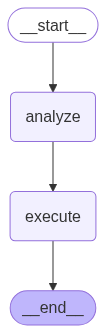

In [8]:
Image(app.get_graph().draw_mermaid_png())

## Testing Our First Agent

In [6]:
# Initial game state
initial_state = {
    "player_position": {"x": 0, "y": 0},
    "health": 25,  # Low health to trigger healing
    "inventory": [],
    "current_action": "",
    "game_phase": "exploration",
    "messages": []
}

# Run the agent
result = app.invoke(initial_state)
print("\nFinal State:")
print(json.dumps(result, indent=2))

Analyzing situation: Phase exploration, Health: 25
Executing action: seek_healing

Final State:
{
  "player_position": {
    "x": 0,
    "y": 0
  },
  "health": 45,
  "inventory": [],
  "current_action": "seek_healing",
  "game_phase": "exploration",
  "messages": [
    "Agent decided to: seek_healing",
    "Health restored to 45"
  ]
}


## Exercise

Try modifying the `analyze_situation` function to handle different scenarios:
1. Add logic for when inventory is empty
2. Create different behaviors for different game phases
3. Add randomness to decision making